# Memory: Pong-v0 | EPOCH Lab 2021

In [1]:
import gym, random

import numpy as np
import matplotlib.pyplot as plt

from skimage import transform
from collections import deque
from IPython.display import clear_output

### Define Environment

In [18]:
env = gym.make("Pong-v0")

In [3]:
frame = env.observation_space
num_states = env.observation_space.shape
num_actions = env.action_space.n

print('Frame:', frame)
print('States:', num_states[0])
print('Actions:', num_actions)

env.env.get_action_meanings()

Frame: Box(210, 160, 3)
States: 210
Actions: 6


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

### Explore environment using random choice

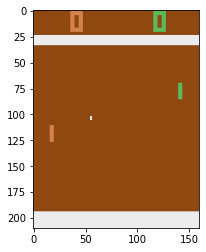

(210, 160, 3)


In [19]:
state = env.reset()
for i in range(50):
    clear_output(wait=True)
    action = random.choice([0,1,2,3,4,5])
    x_state, _, _, _ = env.step(action)
    plt.imshow(x_state)
    plt.show()

print(x_state.shape)

### Hyper-Parameters

In [5]:
INPUT_SHAPE = (84, 84)
WINDOW_DEPTH = 4

In [6]:
state_size = [INPUT_SHAPE[0],INPUT_SHAPE[1],WINDOW_DEPTH]
action_size = num_actions

learning_rate = 0.00025
gamma = 0.99

episodes = 100
max_steps = 10000
batch_size = 64

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.00001 

render = True

In [7]:
### Memory

In [8]:
def process_frame(frame):
    img = frame[25:-8,:]
    img = img.mean(axis=2)
    img = transform.resize(img, [84,84])
    n_img = img / 255.0  
    
    return n_img

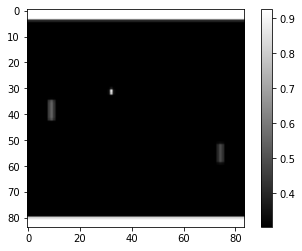

In [9]:
img = process_frame(x_state)
plt.imshow(img, cmap="gray")
plt.colorbar()

In [10]:
def frame_buffer(stack_frames, state, new_episode):
    frame = process_frame(state)
    
    if new_episode:
        for _ in range(4):
            stack_frames.append(frame)
    
    else:
        stack_frames.append(frame)

    stack_state = np.stack(stack_frames, axis=2)
    
    return stack_state, stack_frames

In [11]:
def mem_add(experience):
    return memory.append(experience)

In [12]:
def mem_sample(batch_size):
    mem_size = len(memory)
    index = np.random.choice(np.arange(buffer_size), size = batch_size, replace = False)
    return [memory[i] for i in index]

In [13]:
memory = deque(maxlen=20000)

In [14]:
stack_frames = deque([np.zeros(INPUT_SHAPE, dtype=int) for i in range(WINDOW_DEPTH)], maxlen=4)
state = env.reset()
state, stack_frames = frame_buffer(stack_frames, state, True)

In [15]:
for i in range(batch_size):
    action = random.choice([0,1,2,3,4,5])
    n_state, reward, done, _ = env.step(action)
    
    n_state, stack_frames = frame_buffer(stack_frames, n_state, False)
    
    if done:
        n_state = np.zeros(WINDOW_SIZE)
        mem_add((state, action, reward, n_state, done))
        state = env.reset()
        state, stack_frames = frame_buffer(stack_frames, state, True)
    else:
        mem_add((state, action, reward, n_state, done))
        state = n_state

deque([array([[0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       ...,
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902]]), array([[0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       ...,
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],

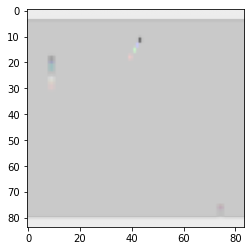

In [17]:
print(stack_frames)
plt.imshow(state)